# library import and data importing

In [1]:
# IMPORTING ALL THE LIBRARY
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from fancyimpute import KNN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree


Using TensorFlow backend.


In [2]:
####################################################################################################################
def dataloss(data1,data2):
    print('### DEFERENCE IN DATA SET')
    print('Feature deleted: ', data1.shape[1]-data2.shape[1])
    print('Observation deleted: ',data1.shape[0]-data2.shape[0])

####################################################################################################################
# Return MAE, MRSE, R², Adjusted R²
def reg_acc(y_true, y_pre):
    return_var = []
    from math import sqrt
    from sklearn.metrics import mean_squared_log_error
    rmse = sqrt(mean_squared_error(y_true,y_pre))
    return_var.append(rmse)
    print ("RMSE of data: ",rmse )
    r2 = r2_score(y_true,y_pre)
    return_var.append(r2)
    print ("R² : ",r2 )
    mae = mean_absolute_error(y_true,y_pre)
    return_var.append(mae)
    print ('MAE:',mae)
    rmsle =np.sqrt(mean_squared_log_error( y_true, y_pre ))
    return_var.append(rmsle)
    print('RMSLE:',rmsle)
    if 0 in y_true : 
        print("MAPE can't be calculated")
        return_var.append(0)
    else :
        mape = round(np.mean(np.abs((y_true - y_pre)/y_true))*100,4)
        print ('MAPE :', mape)
        print('============================')
        print('Model Accuracy(%) :', 100-mape)
        print('============================')
        return_var.append(mape)
        return_var.append(100-mape)
    return return_var
####################################################################################################################
#def ML(x,y):
#    from sklearn.model_selection import train_test_split
#    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)
#    model_name = ['Linear Regression','KNN','Decision Tree','Random Forest']
#    model = [LinearRegression(),KNeighborsRegressor(n_neighbors=5),
#             tree.DecisionTreeRegressor(),RandomForestRegressor(n_estimators=20)]
#    modeling = []
#    for i in range(len(model)):
#        mlmodel = model[i].fit(x_train,y_train)
#        y_predict = mlmodel.predict(x_test)
#        print(model_name[i])
#        reg_acc(y_test,y_predict)
#        modeling.append(mlmodel)   
####################################################################################################################
# Normalized the the data set with respect to the columns porvided
def normalize(data,columns):
    for i in columns:
        print(columns)
        minimum , maximum = data[i].min(), data[i].max()
        data[i] = (data[i] - minimum)/(maximum - minimum)
    return data
####################################################################################################################
# Visualized the predicted value with respect to actual
#def 


In [3]:
# changes the current working directory
os.chdir('D:/Data Science/EDWISOR/2_PORTFOLIO/project 2')
# saving the process data
Org_data = pd.read_csv('day.csv', header = 0)
# Creating the categorical feature  categorical
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']
# Created the loop for converting the feature to categorical data type
for i in categorical_columns:
    Org_data[i] = pd.Categorical(Org_data[i])
Org_data = Org_data.drop(['instant',"dteday",'casual','registered'],axis=1)
# Reason for dropping the features
# 1. dteday --> this feature consist of the date, moreover we already has year and month in our data set.
# 2. casual & registered --> addition of casual and registered is equal to cnt
# 3. Instant --> We don't want the result to be bias based on the instant, ML algorithm will treat instant as numerical data.
# Numerical_col hold all the feature which has numerical data type
Numerical_col = [ i for i in Org_data.columns if i not in categorical_columns ]

In [4]:
Org_data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


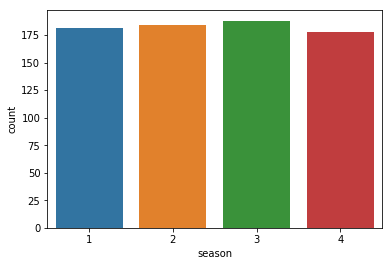

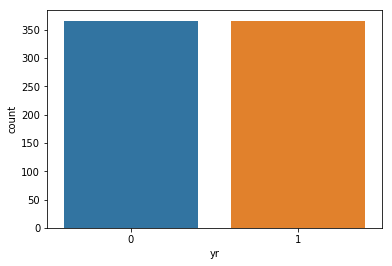

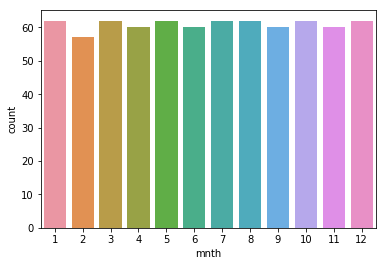

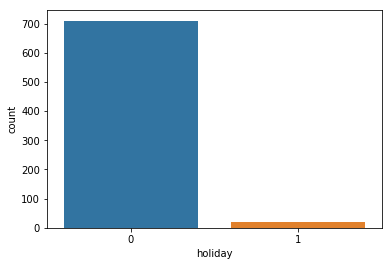

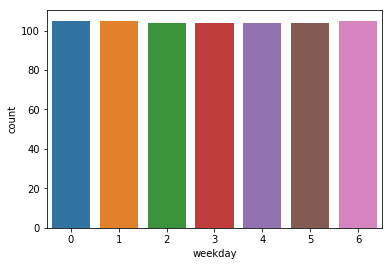

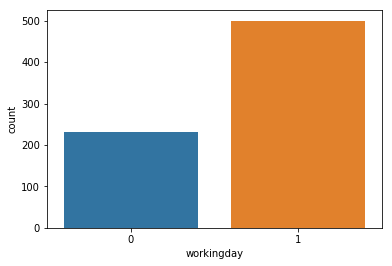

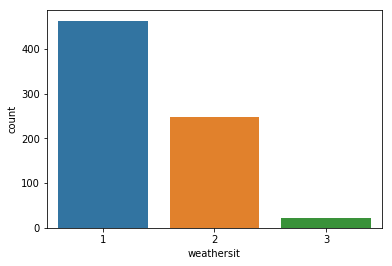

In [5]:
for i in categorical_columns:
    sns.countplot(Org_data[i], )
    plt.show()

Following inference are made with respect to above graphs:
1. Season, yr, month, weekday - events are equaly distributed with respect to season
2. weather - more bike where rent in 1 _(Clear, Few clouds, Partly cloudy, Partly cloudy)_ instence with respect of 2 _(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)_ and 3 _(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scatteredclouds)_


In [6]:
Org_data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


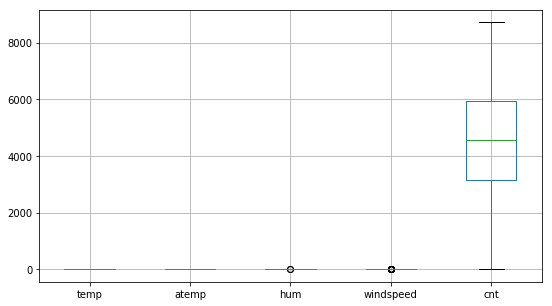

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


In [7]:
Org_data.boxplot(figsize=(9,5))
plt.show()
# INFERENCE:
# Outlier present in the respective feature (hum, windspeed,casual)
# describe function is used to check different parameter with respect to the data set
Org_data.describe()
# INFERENCE:
# With the help of the describe function, we can infer that feature scaling is needed as the  
# casual & registered has bigger scale with repect to temperature and wind speed by checking  
# the minimum value and maximum value of the feature

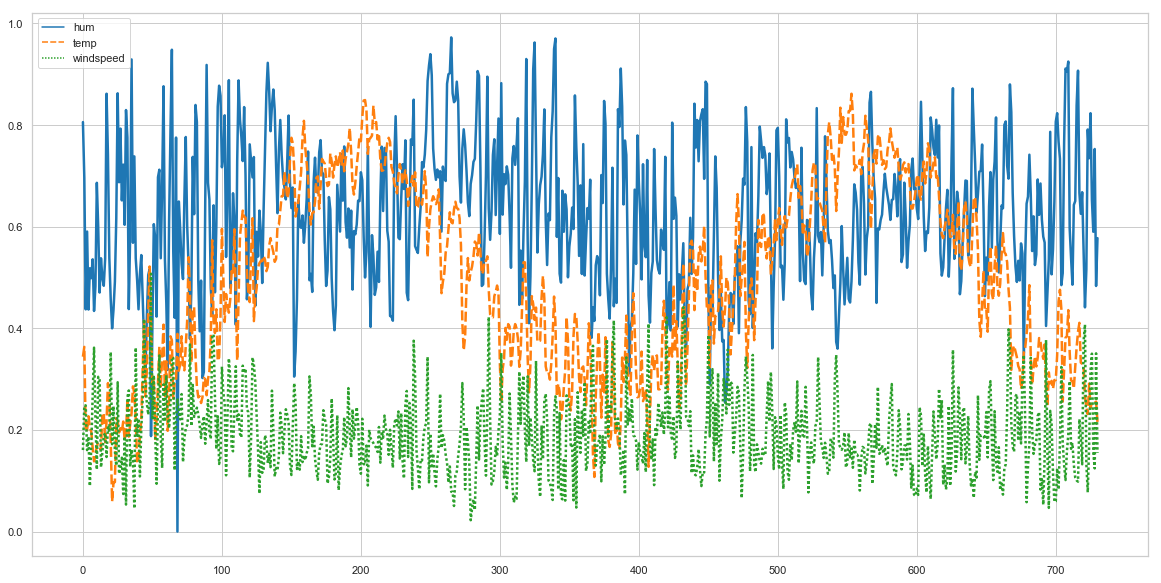

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Org_data[['hum','temp','windspeed']] , palette="tab10", linewidth=2.5,)

## Exploratory Data Analysis

### Missing value analysis

In [9]:
#missing value check
Org_data.isna().sum()
# there is no missing values in the data set

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Outlier Analysis

+++++++----NO OUTLIER IN ---> temp
+++++++----NO OUTLIER IN ---> atemp
+++==================================================================================+++
OUTLIER PRESENT IN  hum


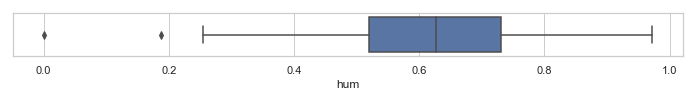

25%: 0.52   Median: 0.626667    75%: 0.7302085    IQR: 0.21020850000000002
Minimum: 0.0     Lower Fence: 0.2047     Upper fence: 1.0455     Maximum: 0.9725
Number of Outliers: 2
+++==================================================================================+++
OUTLIER PRESENT IN  windspeed


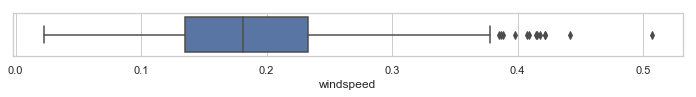

25%: 0.13495   Median: 0.180975    75%: 0.2332145    IQR: 0.0982645
Minimum: 0.0223917     Lower Fence: -0.0124     Upper fence: 0.3806     Maximum: 0.507463
Number of Outliers: 13
+++++++----NO OUTLIER IN ---> cnt


In [10]:
# visualing 'casual','hum','windspeed' data with box and wister method for further analysis
for i in Numerical_col:
    q75,q25 = np.percentile(Org_data.loc[:,i],[75,25])
    iqr=q75-q25
    l_fence,u_fence = round(q25-(iqr*1.5),4),round(q75+(iqr*1.5),4)
    total_outlier = len([num for num in Org_data[i] if num > u_fence or num < l_fence ])
    if total_outlier != 0: 
        print('+++==================================================================================+++')
        print ('OUTLIER PRESENT IN ',i)
        plt.figure(figsize=(12,0.8))
        sns.boxplot(Org_data[i])
        plt.show()
        print('25%:',q25,'  Median:',Org_data[i].median(),'   75%:',q75,'   IQR:',iqr)
        print('Minimum:',Org_data[i].min(),'    Lower Fence:',l_fence,'    Upper fence:',u_fence,'    Maximum:',Org_data[i].max())
        print('Number of Outliers:',total_outlier)

    else: print('+++++++----NO OUTLIER IN --->',i)


We have two choice for outliers.
1. Delete the outliers
2. Impute the outliers

we will try to use first method and will check how it will affect our model

In [11]:
# Pdata_Out1 stands for Outlier processed data by deleting the outliers
Process_data = Org_data.copy()
for i in ['hum','windspeed']:
    print(i)
    q75, q25 = np.percentile(Process_data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min, max = q25 - (iqr*1.5),q75 + (iqr*1.5)
    print('Maximim:', max)
    print('Minimum:', min)
    Process_data = Process_data.drop(Process_data[Process_data.loc[:,i] < min].index)
    Process_data = Process_data.drop(Process_data[Process_data.loc[:,i] > max].index)
    print(i, '--> DONE')

hum
Maximim: 1.0455212500000002
Minimum: 0.20468725
hum --> DONE
windspeed
Maximim: 0.380585
Minimum: -0.012431000000000025
windspeed --> DONE


In [12]:
dataloss(Org_data,Process_data)

### DEFERENCE IN DATA SET
Feature deleted:  0
Observation deleted:  14


In [13]:
# Let's replace the Outliers with NAN and use KNN imputation for imputing the missing value
# Reason for using missing value analysis:
# Generally outliers are extreme low or extremely high varaible so statistical imputation won't be as accurate as KNN
# as KNN use distance formula to impute the missing variable

In [14]:
Process_2 = Org_data.copy()
for i in ['hum','windspeed']:
    print(i)
    q75_1, q25_1 = np.percentile(Process_2.loc[:,i], [75 ,25])
    iqr2 = q75_1 - q25_1
    minimum, maximum = q25_1 - (iqr2*1.5),q75_1 + (iqr2*1.5)
    print('Maximim:', maximum)
    print('Minimum:', minimum)
    Process_2[i] = np.where(Process_2[i] < minimum , np.nan, Process_2[i])
    Process_2[i] = np.where(Process_2[i] > maximum , np.nan, Process_2[i])

hum
Maximim: 1.0455212500000002
Minimum: 0.20468725
windspeed
Maximim: 0.38061125
Minimum: -0.012446750000000034


In [15]:
Process_2.isna().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

In [16]:
from fancyimpute import KNN
Process_2 = pd.DataFrame(KNN(k = 3).complete(Process_2), columns=Process_2.columns)

Imputing row 1/731 with 0 missing, elapsed time: 0.210
Imputing row 101/731 with 0 missing, elapsed time: 0.212
Imputing row 201/731 with 0 missing, elapsed time: 0.213
Imputing row 301/731 with 0 missing, elapsed time: 0.214
Imputing row 401/731 with 0 missing, elapsed time: 0.216
Imputing row 501/731 with 0 missing, elapsed time: 0.217
Imputing row 601/731 with 0 missing, elapsed time: 0.218
Imputing row 701/731 with 0 missing, elapsed time: 0.219


In [17]:
Process_2.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Feature Selection

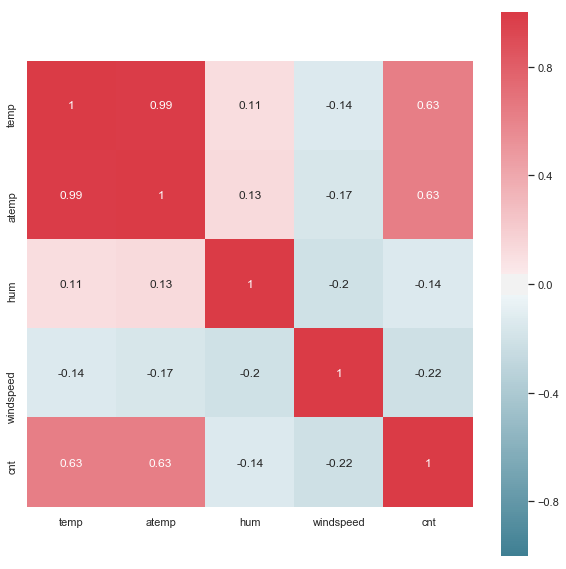

In [18]:
plt.figure(figsize=(10,10))
corr=Process_data.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
            cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,vmin=-1,vmax=1)

With respect the above heatmap we can infer:
1. As expected temp is positively correlated with atemp --> drop temp feature
2. cnt increses as the temp increases, so people tend to rent more bike as the temperature is high
3. humidity and the windspeed are negatively correlated with the cnt. if the air humidity and windspeed is high people will less likely to rent the bike.


In [19]:
Process_data = Process_data.drop(['temp'],axis = 1)

In [20]:
Process_2 = Process_2.drop(['temp'],axis = 1)

### Feature Scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D437070A58>,
      dtype=object)

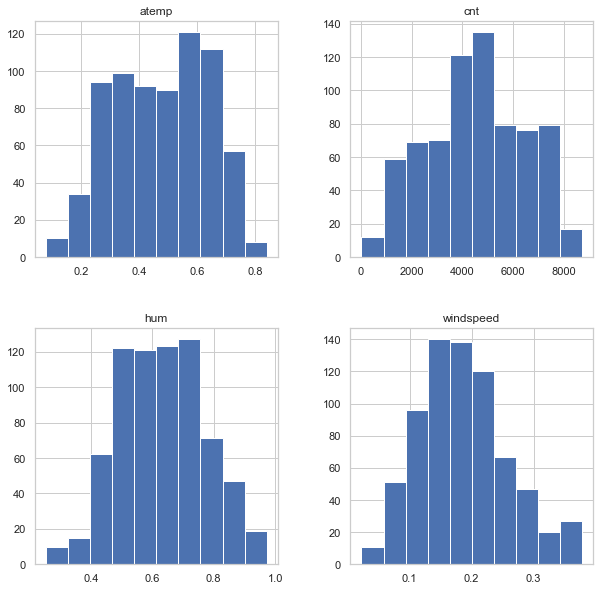

In [21]:
Process_data.hist(figsize=(10,10))
# INFERENCE:
# Moreover, all the numerical data is already normalized so there is no need of feature scaling

## Model Development 

__Following model will be taken into considaration:__
1. Linear Regression
2. Decision Tree
3. Random Forest
4. K-Nearest Neighbors

In [22]:
# Spliting the data set
# Outlier Deleted
independent_data = Process_data.drop(['cnt'],axis = 1)
dependent_data = Process_data['cnt']
x_train,x_test,y_train,y_test = train_test_split(independent_data,dependent_data, 
                                                 test_size = 0.2, random_state = 0)

In [23]:
ind_data = Process_2.drop(['cnt'],axis = 1)
dep_data = Process_2['cnt']
x2_train,x2_test,y2_train,y2_test = train_test_split(ind_data,dep_data, 
                                                 test_size = 0.2, random_state = 0)

### _1. Linear Regression_

In [24]:
# Outlier Deleted
LRmodel = LinearRegression().fit(x_train,y_train)
LR_estimated = LRmodel.predict(x_test)
LR_result = reg_acc(y_test,LR_estimated)
# Linear Regression Result
print(LRmodel.get_params)
print('===============================================')
print('**Intercept: ',LRmodel.intercept_)
for col,coef in zip(x_train.columns,LRmodel.coef_):
    print (col, coef)

RMSE of data:  841.815220965525
R² :  0.8423552833944167
MAE: 610.0950826997182
RMSLE: 0.2376876631453713
MAPE : 17.9779
Model Accuracy(%) : 82.0221
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>
**Intercept:  1465.364492179624
season 488.8434524249345
yr 1997.1782405909955
mnth -33.817800465942284
holiday -475.1422222035401
weekday 58.531990989184514
workingday 98.69463945941224
weathersit -483.99550451866145
atemp 5838.333351561126
hum -1340.5315112611815
windspeed -2368.713824760764


In [25]:
LR2model = LinearRegression().fit(x2_train,y2_train)
LR2_estimated = LR2model.predict(x2_test)
LR2_result = reg_acc(y2_test,LR2_estimated)
# Linear Regression Result
print(LR2model.get_params)
print('===============================================')
print('**Intercept: ',LR2model.intercept_)
for col2,coef2 in zip(x2_train.columns,LR2model.coef_):
    print (col2, coef2)

RMSE of data:  900.3848874448903
R² :  0.809389672800656
MAE: 679.2087761289017
RMSLE: 0.24576363683245497
MAPE : 19.7975
Model Accuracy(%) : 80.2025
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>
**Intercept:  1380.8848956463535
season 472.3135666284957
yr 1979.829426296578
mnth -32.30108663461792
holiday -344.2870456112784
weekday 76.26375313024208
workingday 85.92242997397776
weathersit -540.1410728170653
atemp 6013.086353105512
hum -1208.7200980873324
windspeed -2416.259825138125


### _2. Decision Tree_

In [26]:
# Outlier Deleted
DTree_model = tree.DecisionTreeRegressor().fit(x_train,y_train)
DTree_estimated = DTree_model.predict(x_test)
Decision_result = reg_acc(y_test,DTree_estimated)
for col, per in zip(x_train,DTree_model.feature_importances_):
    print(col, round(per*100,2))
print('PARAMETER IN PERCENTAGE')

RMSE of data:  744.5747807753542
R² :  0.8766717648516062
MAE: 527.4791666666666
RMSLE: 0.24754600308429928
MAPE : 16.4318
Model Accuracy(%) : 83.5682
season 8.44
yr 29.98
mnth 3.68
holiday 0.14
weekday 1.06
workingday 0.84
weathersit 1.18
atemp 41.56
hum 9.0
windspeed 4.11
PARAMETER IN PERCENTAGE


In [27]:
DTree_model2 = tree.DecisionTreeRegressor().fit(x2_train,y2_train)
DTree_estimated2 = DTree_model2.predict(x2_test)
Decision_result2 = reg_acc(y2_test,DTree_estimated2)
for col2, per2 in zip(x2_train,DTree_model2.feature_importances_):
    print(col2, round(per2*100,2))
print('PARAMETER IN PERCENTAGE')

RMSE of data:  961.933688862547
R² :  0.7824393725309129
MAE: 680.7891156462586
RMSLE: 0.5292410167762797
MAPE : 21.9021
Model Accuracy(%) : 78.0979
season 7.91
yr 29.16
mnth 3.03
holiday 0.24
weekday 1.09
workingday 0.46
weathersit 0.67
atemp 44.31
hum 9.41
windspeed 3.72
PARAMETER IN PERCENTAGE


In [28]:
# let's check the how tree grows
dotfile = open('pt.dot','w')
df = tree.export_graphviz(DTree_model, out_file= dotfile)

### _3. Random Forest_

In [29]:
# Outlier Deleted
random_tree = [i*10 for i in range(1,16)] 
rmse , r_sq , mae , rmsle , mape = [],[],[],[],[]
for tree_size in random_tree:
    print('Tree Size:', tree_size)
    random_model = RandomForestRegressor(n_estimators=int(tree_size)).fit(x_train,y_train)
    estimation = random_model.predict(x_test)
    result = reg_acc(y_test,estimation)
    rmse.append(result[0])
    r_sq.append(result[1])
    mae.append(result[2])
    rmsle.append(result[3])
    mape.append(result[4])


Tree Size: 10
RMSE of data:  672.2400953259846
R² :  0.8994702282865754
MAE: 469.83263888888894
RMSLE: 0.22292178067193613
MAPE : 15.4788
Model Accuracy(%) : 84.5212
Tree Size: 20
RMSE of data:  643.939540866739
R² :  0.9077564392008965
MAE: 448.56041666666664
RMSLE: 0.22880969828572237
MAPE : 15.7491
Model Accuracy(%) : 84.2509
Tree Size: 30
RMSE of data:  661.7724325335861
R² :  0.9025766148852797
MAE: 454.89097222222216
RMSLE: 0.2355123042812473
MAPE : 16.0091
Model Accuracy(%) : 83.9909
Tree Size: 40
RMSE of data:  659.7935598890057
R² :  0.9031583865587657
MAE: 462.03107638888883
RMSLE: 0.22077001366988802
MAPE : 15.3951
Model Accuracy(%) : 84.6049
Tree Size: 50
RMSE of data:  637.1683803577967
R² :  0.9096861609755202
MAE: 447.3252777777778
RMSLE: 0.22955061858892056
MAPE : 15.5172
Model Accuracy(%) : 84.4828
Tree Size: 60
RMSE of data:  661.9064525643887
R² :  0.9025371511465955
MAE: 460.883449074074
RMSLE: 0.23174244505405023
MAPE : 15.9473
Model Accuracy(%) : 84.0527
Tree Size

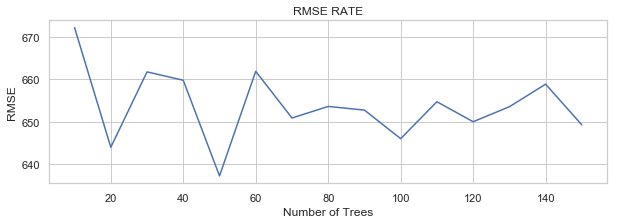

In [30]:
plt.figure(figsize=(10,3))
plt.title('RMSE RATE')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
sns.lineplot(x=random_tree,y=rmse)

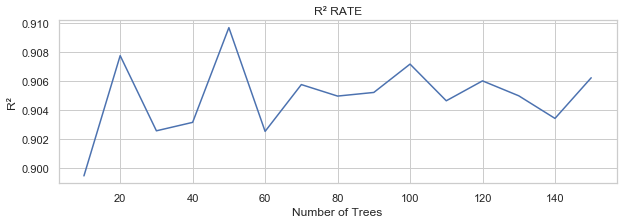

In [31]:
plt.figure(figsize=(10,3))
plt.title('R² RATE')
plt.xlabel('Number of Trees')
plt.ylabel('R²')
sns.lineplot(x=random_tree,y=r_sq)

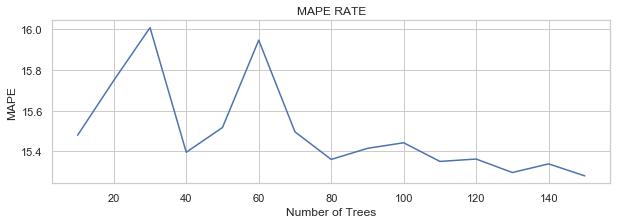

In [32]:
plt.figure(figsize=(10,3))
plt.title('MAPE RATE')
plt.xlabel('Number of Trees')
plt.ylabel('MAPE')
sns.lineplot(x=random_tree,y=mape)

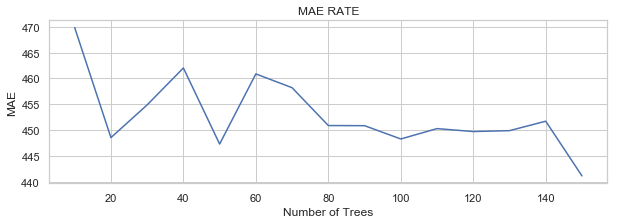

In [33]:
plt.figure(figsize=(10,3))
plt.title('MAE RATE')
plt.xlabel('Number of Trees')
plt.ylabel('MAE')
sns.lineplot(x=random_tree,y=mae)

In [34]:
# Outlier Deleted
RF_model = RandomForestRegressor(n_estimators= 60).fit(x_train,y_train)
RF_estimated = RF_model.predict(x_test)
rf_result = reg_acc(y_test,RF_estimated)
print('PARAMETER IN PERCENTAGE')
for col, per in zip(x_train,RF_model.feature_importances_):
    print(col, round(per*100,2))

RMSE of data:  645.2323430906235
R² :  0.907385682688805
MAE: 440.89560185185184
RMSLE: 0.2218419506079228
MAPE : 15.0184
Model Accuracy(%) : 84.9816
PARAMETER IN PERCENTAGE
season 5.9
yr 28.5
mnth 3.59
holiday 0.36
weekday 1.33
workingday 0.5
weathersit 1.79
atemp 47.93
hum 6.46
windspeed 3.65


In [35]:
RF_model2 = RandomForestRegressor(n_estimators= 60).fit(x2_train,y2_train)
RF_estimated2 = RF_model2.predict(x2_test)
rf_result2 = reg_acc(y2_test,RF_estimated2)
print('PARAMETER IN PERCENTAGE')
for col2, per2 in zip(x2_train,RF_model2.feature_importances_):
    print(col2, round(per2*100,2))

RMSE of data:  649.8326009673917
R² :  0.9007128547913215
MAE: 489.6302721088435
RMSLE: 0.26317713126966846
MAPE : 19.0407
Model Accuracy(%) : 80.9593
PARAMETER IN PERCENTAGE
season 6.62
yr 28.86
mnth 3.26
holiday 0.3
weekday 1.55
workingday 0.46
weathersit 1.74
atemp 46.53
hum 7.11
windspeed 3.57


### _4. K-Nearest Neighbors_

In [36]:
# Outlier Deleted
knn_model = KNeighborsRegressor(n_neighbors= 5).fit(x_train,y_train)
knn_estimated = knn_model.predict(x_test)
knn_result = reg_acc(y_test,knn_estimated)

RMSE of data:  864.9603117099266
R² :  0.8335674630773875
MAE: 669.7819444444444
RMSLE: 0.2594939488633473
MAPE : 20.9545
Model Accuracy(%) : 79.0455


In [37]:
knn_model2 = KNeighborsRegressor(n_neighbors= 5).fit(x2_train,y2_train)
knn_estimated2 = knn_model2.predict(x2_test)
knn_result2 = reg_acc(y2_test,knn_estimated2)

RMSE of data:  957.438805703355
R² :  0.7844678384105206
MAE: 745.2
RMSLE: 0.3347235050985529
MAPE : 28.3186
Model Accuracy(%) : 71.6814


### Accuaracy chart

In [38]:
result = {'linear Reg(OD)':LR_result,'Decision Tree(OD)':Decision_result,'Random Forest(OD)':rf_result,'KNN(OD)': knn_result}

In [39]:
result_dataset = pd.DataFrame(result)
result_dataset.index = ['RMSE','R²','MAE','RMSLE','MAPE','ACCURACY(%)']

In [40]:
result_dataset['linear Reg(IP)']    = LR2_result
result_dataset['Decision Tree(IP)'] = Decision_result2
result_dataset['Random Forest(IP)'] = rf_result2
result_dataset['KNN(IP)']           = knn_result2

In [41]:
# OD : Result after Outlier deletion
# IP : Result after Outlier imputation
result_dataset

,linear Reg(OD),Decision Tree(OD),Random Forest(OD),KNN(OD),linear Reg(IP),Decision Tree(IP),Random Forest(IP),KNN(IP)
RMSE,841.815221,744.574781,645.232343,864.960312,900.384887,961.933689,649.832601,957.438806
R²,0.842355,0.876672,0.907386,0.833567,0.809390,0.782439,0.900713,0.784468
MAE,610.095083,527.479167,440.895602,669.781944,679.208776,680.789116,489.630272,745.200000
RMSLE,0.237688,0.247546,0.221842,0.259494,0.245764,0.529241,0.263177,0.334724
MAPE,17.977900,16.431800,15.018400,20.954500,19.797500,21.902100,19.040700,28.318600
ACCURACY(%),82.022100,83.568200,84.981600,79.045500,80.202500,78.097900,80.959300,71.681400


## Final Inference:
#### As per the above analysis and result generated shown in result dataframe, 
#### Random Forest algorithm tend to provide the better result in repect to this data set
#### Moreover, after imputing the outliers with KNN imputation the accuracy of all the algorithm decreases by 2%-5%